# Aula 05 - EDA com pandas: ferramentas básicas e gráficos

___
Na aula passada, iniciamos nosso estudo da biblioteca **pandas**.

Alguns dos principais pontos que vimos, foram:
- o **elemento básico** da biblioteca *pandas* é o objeto *pandas.Series*. Este, por sua vez, é estruturado a partir dos **arrays** de *numpy*;
- um **pandas.DataFrame** é um objeto que engloba um conjunto de *pandas.Series*;
- geralmente, associaremos cada coluna no nosso conjunto de dados a uma série do pandas, e cada linha do DataFrame representará uma observação;
- existem funções muito úteis para manipular conjuntos de dados e obter métricas de agregação a partir deles.

Nesta aula, iremos continuar nosso estudo enfocando algumas outras funções bastante importantes para o pandas, ilustrando com algumas bases de dados.

___

In [202]:
import pandas as pd

In [203]:
df = pd.read_csv("population-and-demography.csv")

**.head():** visualizando as primeiras linhas do dataframe

### O que podemos explorar nesse conjunto de dados?

In [204]:
df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


In [207]:
# Quantos registros de pessoas mais velhas que 100 anos?
(df["Population older than 100 years"] > 0).sum()

13523

In [208]:
df[(df["Population older than 100 years"] > 0)]

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
18,Afghanistan,1968,10247782,445626.0,1839083,4427898,6356450,5544011,5819883,5205912,...,1006880,1691010,1228223,865410,564802,319201,124092,19660,605,1.0
19,Afghanistan,1969,10494491,458078.0,1894961,4563995,6525350,5649462,5930495,5298458,...,1022510,1725204,1251304,883917,576137,324386,126130,20268,639,1.0
20,Afghanistan,1970,10752973,470485.0,1952791,4705422,6700729,5761197,6047550,5396652,...,1047106,1755368,1274479,902653,588007,330016,128348,20897,676,1.0
21,Afghanistan,1971,11015853,483113.0,2011245,4848646,6878049,5875332,6167206,5497000,...,1077924,1781762,1297423,921039,599944,336054,130782,21560,718,1.0
22,Afghanistan,1972,11286753,496219.0,2070876,4995574,7060970,5993595,6291178,5601031,...,1109676,1809740,1321272,939466,612071,342463,133460,22270,760,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,Zimbabwe,2017,14751101,464521.0,2287404,6217928,9224369,8056253,8532951,7476399,...,1690993,2422873,2021973,1088878,570769,467775,200927,59789,8974,222.0
18284,Zimbabwe,2018,15052191,466524.0,2283576,6291632,9385132,8264833,8760331,7689502,...,1732035,2474502,2058928,1155537,585529,476214,208587,59700,9299,228.0
18285,Zimbabwe,2019,15354606,468844.0,2281740,6367398,9543409,8473475,8986973,7909270,...,1759205,2546398,2085636,1220993,606266,479827,218763,60339,9546,235.0
18286,Zimbabwe,2020,15669663,470340.0,2287105,6449021,9709135,8691594,9220402,8139472,...,1776240,2640150,2101852,1291333,631541,476507,231604,61546,9629,240.0


In [209]:
# Vamos somar a população (entre anos) com mais de 100 anos por país
df.groupby("Country name")["Population older than 100 years"].sum()

# 1,47 x 10^3 = 1470

Country name
Afghanistan       1.471000e+03
Africa (UN)       2.260470e+05
Albania           6.951000e+03
Algeria           7.822000e+03
American Samoa    0.000000e+00
                      ...     
Western Sahara    4.430000e+02
World             1.012775e+07
Yemen             1.910000e+02
Zambia            1.582000e+03
Zimbabwe          4.675000e+03
Name: Population older than 100 years, Length: 254, dtype: float64

In [213]:
df.groupby("Country name")["Population older than 100 years"].sum().sort_values(ascending = False)[0:25]

Country name
World                                                          1.012775e+07
More developed regions                                         6.908991e+06
High-income countries                                          6.790696e+06
Asia (UN)                                                      3.810919e+06
Less developed regions                                         3.218762e+06
Less developed regions, excluding least developed countries    3.111085e+06
Europe (UN)                                                    2.875113e+06
Less developed regions, excluding China                        2.693543e+06
Upper-middle-income countries                                  2.212981e+06
Northern America (UN)                                          2.157059e+06
United States                                                  1.958609e+06
Japan                                                          1.768419e+06
Lower-middle-income countries                                  1.034042e+06

In [214]:
df[["Year", "Country name", "Population older than 100 years"]].head()

,Year,Country name,Population older than 100 years
0,1950,Afghanistan,0.0
1,1951,Afghanistan,0.0
2,1952,Afghanistan,0.0
3,1953,Afghanistan,0.0
4,1954,Afghanistan,0.0


In [219]:
df.groupby(["Country name", "Year", ])["Population older than 100 years"].max()

Country name  Year
Afghanistan   1950      0.0
              1951      0.0
              1952      0.0
              1953      0.0
              1954      0.0
                      ...  
Zimbabwe      2017    222.0
              2018    228.0
              2019    235.0
              2020    240.0
              2021    237.0
Name: Population older than 100 years, Length: 18288, dtype: float64

___

In [220]:
df.info() # informações básicas de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                18288 non-null  object 
 1   Year                                        18288 non-null  int64  
 2   Population                                  18288 non-null  int64  
 3   Population of children under the age of 1   18288 non-null  float64
 4   Population of children under the age of 5   18288 non-null  int64  
 5   Population of children under the age of 15  18288 non-null  int64  
 6   Population under the age of 25              18288 non-null  int64  
 7   Population aged 15 to 64 years              18288 non-null  int64  
 8   Population older than 15 years              18288 non-null  int64  
 9   Population older than 18 years              18288 non-null  int64  
 10  Population

In [221]:
df.shape

(18288, 24)

___

[.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Com o comando ".plot" do pandas (que funciona com a biblioteca matplotlib), podemos visualizar graficamente as relações que queremos estudar!

<AxesSubplot: title={'center': 'População maior de 100 anos ao longo do tempo no Brasil'}>

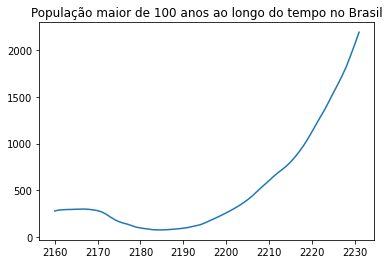

In [228]:
# por padrão, o tipo de plot do pandas é um gráfico de linhas
df[df["Country name"] == "Brazil"]["Population older than 100 years"].plot(
    title = "População maior de 100 anos ao longo do tempo no Brasil"
)

<AxesSubplot: xlabel='Year'>

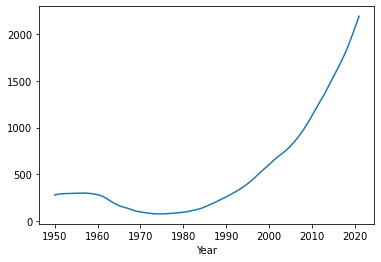

In [232]:
df[df["Country name"] == "Brazil"].groupby("Year")["Population older than 100 years"].mean().plot()

In [235]:
df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


In [241]:
import numpy as np

In [246]:
df_agrupado = df[df["Country name"].isin(["Brazil", "World"])].groupby(["Year", "Country name"])["Population older than 100 years"].mean().unstack()

<AxesSubplot: xlabel='Year'>

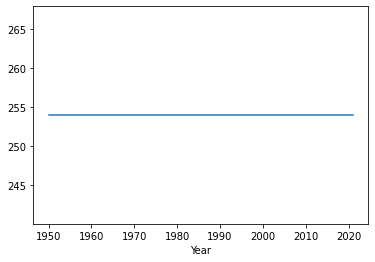

In [250]:
df.groupby("Year")["Country name"].count().plot()

In [252]:
df_agrupado["World"] = df_agrupado["World"]/250

<AxesSubplot: xlabel='Year'>

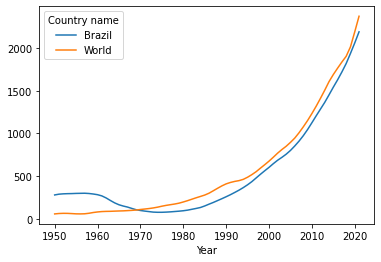

In [255]:
df_agrupado.plot()

<AxesSubplot: xlabel='Year'>

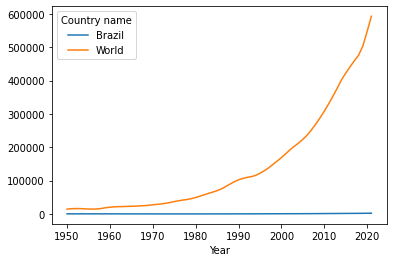

In [245]:
# E se quisermos comparar com o resto do mundo?
df[df["Country name"].isin(["Brazil", "World"])].groupby(["Year", "Country name"])["Population older than 100 years"].mean().unstack().plot()

___
### EXTRA: matplotlib


O matplotlib é uma biblioteca que permite graficar diversos tipos de representações diretamente a partir de arrays. Possui essencialmente todos os tipos de gráficos que estudamos na aula passada, mas com uma sintaxe diferente a do pandas, o que afetará não somente como plotamos as visualizações, mas, também, elementos "estéticos" associados a elas (como legendas, eixos e afins). 

É um pacote de visualização gráfica altamente utilizado em Python, **e que baseia a construção de gráficos em diversas outras bibliotecas**, como seaborn, e o próprio **pandas**. 

Em vários dos plots que fizemos acima, talvez você tenha notado que o retorno da função .plot é um objeto do tipo "axes", **estrutural do matplotlib**. A biblioteca do matplotlib define alguns **elementos básicos** a partir dos quais se estruturam todas as suas funções.

#### Elementos básicos de uma figura com matplotlib

[Guia oficial do matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

Na figura abaixo, temos definidos os **elementos básicos** mencionados acima. Eles servirão como parâmetros nas mais variadas funções da biblioteca.

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="drawing" width="600"/>

É essencial que entendamos três outros elementos fundamentais para a melhor utilização da biblioteca matplotlib:

**-Figure:** a visualização em si; a imagem que é impressa na tela.

**-Axes:** o "corpo" do gráfico. Refere-se ao plot em si.

**-Axis:** os eixos do plot (eixo-x; eixo-y; eixo-z).

As visualizações em pandas são construídas a partir dos elementos da biblioteca matplotlib! Isso significa que, para melhor manipular as visualizações, conhecer fundamentos desta biblioteca é fundamental.
___

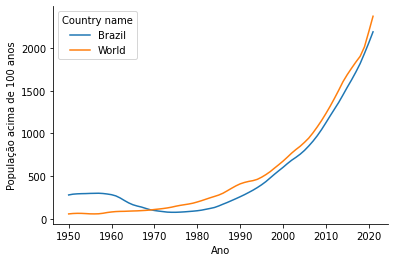

In [261]:
ax = df_agrupado.plot()
ax.set_xlabel("Ano")
ax.set_ylabel("População acima de 100 anos")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

Uma outra biblioteca: **seaborn**

A biblioteca **seaborn** é baseada em **matplotlib**, e se integra, também, facilmanete a **pandas**. É muito utilizada para gerar visualizações estatísticas, principalmente durante **análises exploratórias de dados**, através de uma API de alto nível. 

Por padrão, a biblioteca já gera visualizações esteticamente bastante agradáveis.

**Leituras interessantes**

[Artigo científico da biblioteca](https://joss.theoj.org/papers/10.21105/joss.03021)

[Guia introdutório da biblioteca](https://seaborn.pydata.org/tutorial/introduction.html)

Alguns pontos para se ter em mente (destacados no próprio guia introdutório mencionado acima):

*While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.*

A biblioteca **seaborn** distingue entre funções a nível de **axes** e de **figure**. 

**Axes-level functions:** atuam no objeto *axes* do matplotlib, gerando plots contidos **apenas nos eixos**.

**Figure-level functions:** atuam no objeto *Figure* do matplotlib, gerando plots que compreendem **toda uma figura**.

In [262]:
import seaborn as sns

In [263]:
df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


In [265]:
df_to_plot = df[df["Country name"].isin(["Brazil", "Spain"])][["Year", "Population", "Country name"]]
df_to_plot.head()

,Year,Population,Country name
2160,1950,53955360,Brazil
2161,1951,55591060,Brazil
2162,1952,57283340,Brazil
2163,1953,59025680,Brazil
2164,1954,60827596,Brazil


<AxesSubplot: xlabel='Year', ylabel='Population'>

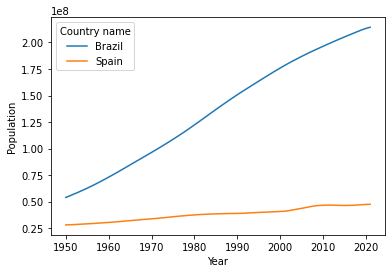

In [266]:
sns.lineplot(data = df_to_plot,
             x = "Year",
             y = "Population",
             hue = "Country name"
            )

Com a biblioteca seaborn, não precisamos agrupar os dados previamente! Basta que saibamos qual o resultado final que queremos, e que os dados estejam no formato apropriado!

<AxesSubplot: xlabel='Year', ylabel='Population'>

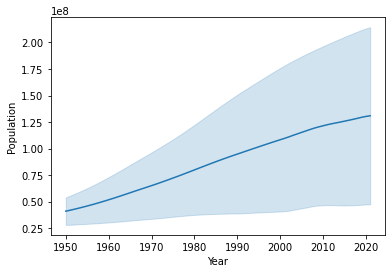

In [268]:
sns.lineplot(data = df_to_plot,
             x = "Year",
             y = "Population"
            )

<AxesSubplot: xlabel='Year', ylabel='Population'>

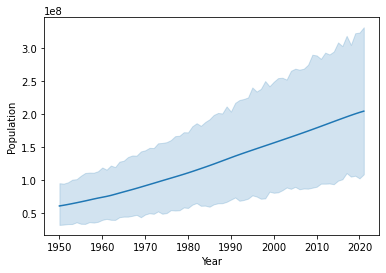

In [269]:
sns.lineplot(data = df,
             x = "Year",
             y = "Population"
            )

Por padrão, quando temos mais de uma dimensão disponível não agrupada, o seaborn realiza a média entre todos os grupos (neste caso, cada entrada em 'Country name'). O agrupamento padrão é com a medida de média, e a dispersão é calculada a partir do intervalo de confiança no nível de 95% (consulte mais detalhes na documentação de cada plot!).

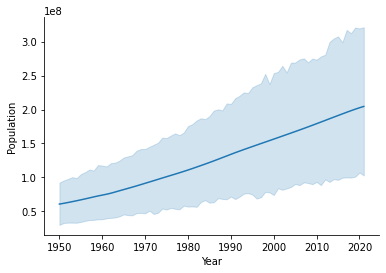

In [270]:
ax = sns.lineplot(data = df,
             x = "Year",
             y = "Population"
            )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

A biblioteca também opera sobre o matplotlib, retornando os mesmos objetos, conforme exemplo acima (axes).

___

#### Quais os países com as maiores populações no ano mais recente do dataset?

In [273]:
df["Year"].max() # Encontrando o ano mais recente

2021

In [274]:
df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


<AxesSubplot: ylabel='Country name'>

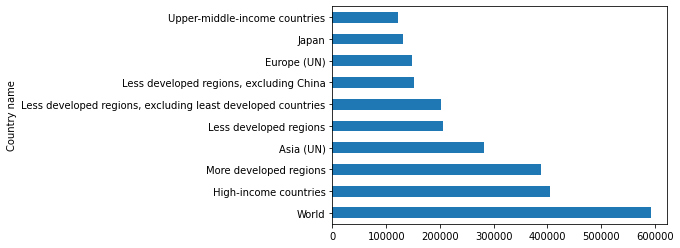

In [281]:
df[df["Year"] == df["Year"].max()].groupby("Country name")["Population older than 100 years"].mean().sort_values(ascending = False)[0:10].plot(kind = 'barh')

In [282]:
df[df["Year"] == 2021].groupby("Country name")["Population"].sum().sort_values(ascending = False)\
    .drop(["World", "Less developed regions", "Less developed regions, excluding least developed countries",
          "Less developed regions, excluding China", "Asia (UN)", "Lower-middle-income countries",
          "Upper-middle-income countries", "Africa (UN)", "More developed regions", "High-income countries",
          "Least developed countries", "Europe (UN)", "Low-income countries", "Latin America and the Caribbean (UN)",
          "Land-locked developing countries (LLDC)", "Northern America (UN)"])[0:10]

Country name
China            1425893500
India            1407563900
United States     336997630
Indonesia         273753180
Pakistan          231402110
Brazil            214326220
Nigeria           213401330
Bangladesh        169356240
Russia            145102750
Mexico            126705140
Name: Population, dtype: int64

<AxesSubplot: title={'center': 'Top 10 países mais populosos em 2021'}, ylabel='Country name'>

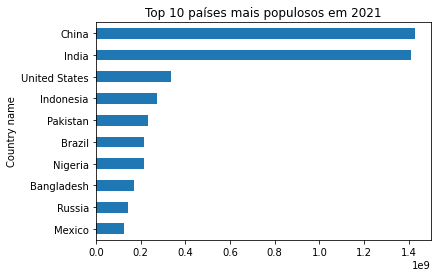

In [284]:
df[df["Year"] == 2021].groupby("Country name")["Population"].sum().sort_values(ascending = False)\
    .drop(["World", "Less developed regions", "Less developed regions, excluding least developed countries",
          "Less developed regions, excluding China", "Asia (UN)", "Lower-middle-income countries",
          "Upper-middle-income countries", "Africa (UN)", "More developed regions", "High-income countries",
          "Least developed countries", "Europe (UN)", "Low-income countries", "Latin America and the Caribbean (UN)",
          "Land-locked developing countries (LLDC)", "Northern America (UN)"])[0:10].sort_values().plot(kind = 'barh',
                                                                                                       title = "Top 10 países mais populosos em 2021")

In [285]:
import plotly.express as px

In [289]:
px.line(df[df["Country name"] == "Brazil"],
       x = "Year",
       y = "Population")

#### E o total de população do mundo ao longo das décadas?

<AxesSubplot: ylabel='Frequency'>

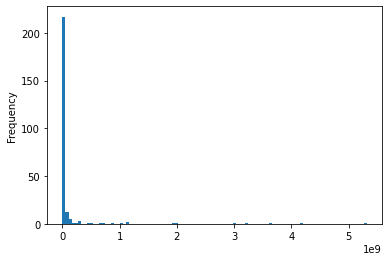

In [304]:
df[df["Year"].isin([1990])]["Population"].plot(kind = 'hist', bins = 100)

In [306]:
df[df["Year"].isin([1990, 2000, 2010, 2020])].groupby("Year")["Population"].mean()

Year
1990    1.340377e+08
2000    1.564489e+08
2010    1.791719e+08
2020    2.025958e+08
Name: Population, dtype: float64

(10.0, 10000000.0)

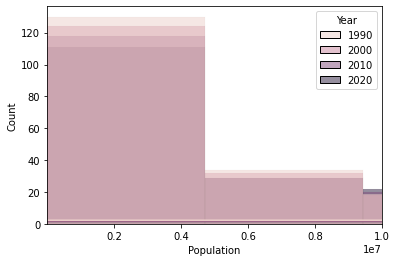

In [307]:
ax = sns.histplot(data = df[df["Year"].isin([1990, 2000, 2010, 2020])],
                x = "Population",
                hue = "Year",
                 kde = True)
ax.set_xlim(left = 10, right = 10000000)

(10.0, 1000000000.0)

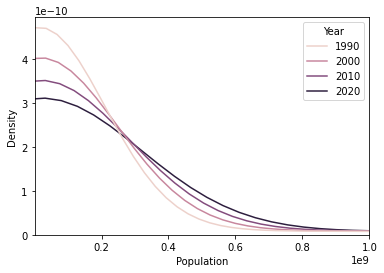

In [301]:
ax = sns.kdeplot(data = df[df["Year"].isin([1990, 2000, 2010, 2020])],
                x = "Population",
                hue = "Year")
ax.set_xlim(left = 10, right = 1000000000)

___
### Vamos avaliar uma outra base de dados?

[Vamos avaliar dados da base do State of Data Brazil 2022](https://www.kaggle.com/datasets/datahackers/state-of-data-2022)

In [308]:
df = pd.read_csv("state_of_data_2022.csv")

In [309]:
df.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')",...,"('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
df.shape

(4271, 353)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Columns: 353 entries, ('P0', 'id') to ('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')
dtypes: bool(1), float64(284), object(68)
memory usage: 11.5+ MB


In [313]:
df.isna().sum() # tem NaN?

('P0', 'id')                                                                                                                     0
('P1_a ', 'Idade')                                                                                                              74
('P1_a_1 ', 'Faixa idade')                                                                                                       0
('P1_b ', 'Genero')                                                                                                              9
('P1_c ', 'Cor/raca/etnia')                                                                                                      0
                                                                                                                              ... 
('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')            3642
('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata 

Essa base é bem diferente da anterior, não é mesmo? Parece que vamos precisar fazer um pouco de "limpeza" nos dados!

Vamos entender algumas informações báscias dos nossos dados?

<AxesSubplot: ylabel='Frequency'>

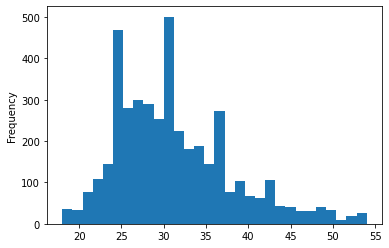

In [318]:
# Qual a distribuição de idades dos respondentes?
df["('P1_a ', 'Idade')"].dropna().plot(kind = 'hist', bins = 30)

In [320]:
media = df["('P1_a ', 'Idade')"].mean()
media

31.169168453657374

In [322]:
mediana = df["('P1_a ', 'Idade')"].median()
mediana

30.0

In [323]:
import matplotlib.pyplot as plt

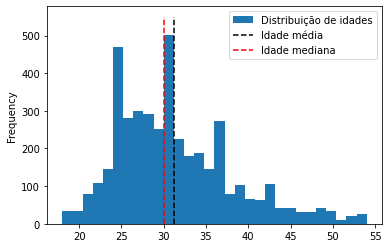

In [328]:
# Qual a distribuição de idades dos respondentes?
ax = df["('P1_a ', 'Idade')"].dropna().plot(kind = 'hist', bins = 30)

# média
ax.vlines(x = media, ymin = 0, ymax = 550, colors = 'black', linestyle = 'dashed')

# mediana
ax.vlines(x = mediana, ymin = 0, ymax = 550, colors = 'red', linestyle = 'dashed')

plt.legend(["Distribuição de idades", "Idade média", "Idade mediana"])

**Como é a distribuição de idades por nível do cargo?**

In [329]:
df["('P2_g ', 'Nivel')"].unique()

array(['Júnior', nan, 'Pleno', 'Sênior'], dtype=object)

In [330]:
df.groupby("('P2_g ', 'Nivel')")["('P1_a ', 'Idade')"].median()

('P2_g ', 'Nivel')
Júnior    27.0
Pleno     29.0
Sênior    32.0
Name: ('P1_a ', 'Idade'), dtype: float64

In [331]:
df.groupby("('P2_g ', 'Nivel')")["('P1_a ', 'Idade')"].mean()

('P2_g ', 'Nivel')
Júnior    27.941584
Pleno     30.150476
Sênior    33.272933
Name: ('P1_a ', 'Idade'), dtype: float64

Text(0.5, 0, 'Senioridade')

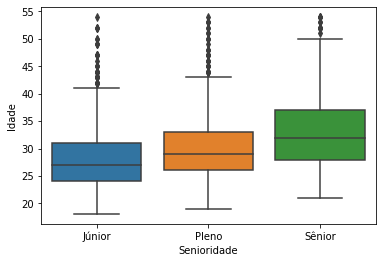

In [333]:
ax = sns.boxplot(data = df,
           x = "('P2_g ', 'Nivel')",
           y = "('P1_a ', 'Idade')")

ax.set_ylabel("Idade")
ax.set_xlabel("Senioridade")

Text(0.5, 0, 'Senioridade')

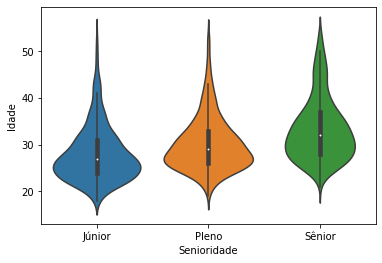

In [334]:
ax = sns.violinplot(data = df,
           x = "('P2_g ', 'Nivel')",
           y = "('P1_a ', 'Idade')")

ax.set_ylabel("Idade")
ax.set_xlabel("Senioridade")

Parece existir uma tendência de, realmente, pessoas mais velhas ocuparem cargos com maiores senioridades, como seria esperado! Vale notar que existe certa discrepância neste comportamento: temos um número razoável de outliers para a senioridade "Júnior", por exemplo. A que isso pode ser devido?

**Para refletir:** como podemos assertir que a tendência que estamos observando é significativa?

___

In [335]:
ax = sns.boxplot(data = df,
           x = "('P2_g ', 'Nivel')",
           y = "('P2_h ', 'Faixa salarial')")

ax.set_ylabel("Idade")
ax.set_xlabel("Senioridade")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [337]:
df["('P2_h ', 'Faixa salarial')"]

0        de R$ 8.001/mês a R$ 12.000/mês
1         de R$ 4.001/mês a R$ 6.000/mês
2       de R$ 12.001/mês a R$ 16.000/mês
3       de R$ 12.001/mês a R$ 16.000/mês
4         de R$ 6.001/mês a R$ 8.000/mês
                      ...               
4266      de R$ 4.001/mês a R$ 6.000/mês
4267      de R$ 3.001/mês a R$ 4.000/mês
4268    de R$ 16.001/mês a R$ 20.000/mês
4269               Menos de R$ 1.000/mês
4270      de R$ 3.001/mês a R$ 4.000/mês
Name: ('P2_h ', 'Faixa salarial'), Length: 4271, dtype: object

In [338]:
df["('P2_h ', 'Faixa salarial')"].unique()

array(['de R$ 8.001/mês a R$ 12.000/mês',
       'de R$ 4.001/mês a R$ 6.000/mês',
       'de R$ 12.001/mês a R$ 16.000/mês',
       'de R$ 6.001/mês a R$ 8.000/mês', 'de R$ 2.001/mês a R$ 3.000/mês',
       'de R$ 3.001/mês a R$ 4.000/mês', nan,
       'de R$ 20.001/mês a R$ 25.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês',
       'de R$ 1.001/mês a R$ 2.000/mês', 'Menos de R$ 1.000/mês',
       'de R$ 25.001/mês a R$ 30.000/mês', 'Acima de R$ 40.001/mês',
       'de R$ 30.001/mês a R$ 40.000/mês'], dtype=object)

In [339]:
# Podemos colocar a média de cada faixa salarial
faixas_salariais = {
    'Acima de R$ 40.001/mês': 40000,
    'Menos de R$ 1.000/mês': 500,
    'de R$ 1.001/mês a R$ 2.000/mês': 1500,
    'de R$ 2.001/mês a R$ 3.000/mês': 2500,
    'de R$ 3.001/mês a R$ 4.000/mês': 3500,
    'de R$ 4.001/mês a R$ 6.000/mês': 5000,
    'de R$ 6.001/mês a R$ 8.000/mês': 7000,
    'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500,
    'de R$ 25.001/mês a R$ 30.000/mês': 27500,
    'de R$ 30.001/mês a R$ 40.000/mês': 35000,
    np.nan: np.nan
}

In [342]:
df["Média salarial"] = df["('P2_h ', 'Faixa salarial')"].apply(
lambda faixa_salarial: faixas_salariais[faixa_salarial]
)

In [344]:
df[["('P2_h ', 'Faixa salarial')", "Média salarial"]]

,"('P2_h ', 'Faixa salarial')",Média salarial
0,de R$ 8.001/mês a R$ 12.000/mês,10000.0
1,de R$ 4.001/mês a R$ 6.000/mês,5000.0
2,de R$ 12.001/mês a R$ 16.000/mês,14000.0
3,de R$ 12.001/mês a R$ 16.000/mês,14000.0
4,de R$ 6.001/mês a R$ 8.000/mês,7000.0
...,...,...
4266,de R$ 4.001/mês a R$ 6.000/mês,5000.0
4267,de R$ 3.001/mês a R$ 4.000/mês,3500.0
4268,de R$ 16.001/mês a R$ 20.000/mês,18000.0
4269,Menos de R$ 1.000/mês,500.0


<AxesSubplot: xlabel="('P2_g ', 'Nivel')", ylabel='Média salarial'>

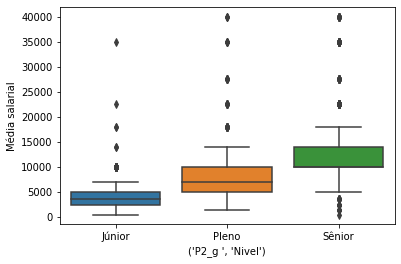

In [345]:
sns.boxplot(data = df,
           x = "('P2_g ', 'Nivel')",
           y = "Média salarial"
)

Acima, "inputamos" apenas valores médios. Como poderíamos deixar o resultado ainda mais preciso?

In [347]:
import numpy as np

In [352]:
def get_random_gaussian_salary(m):
    return np.random.normal(m, m/10)

In [354]:
df["Média salarial 2"] = df["Média salarial"].apply(lambda x: get_random_gaussian_salary(x))

In [355]:
df[["('P2_h ', 'Faixa salarial')", "Média salarial 2"]]

,"('P2_h ', 'Faixa salarial')",Média salarial 2
0,de R$ 8.001/mês a R$ 12.000/mês,9161.951085
1,de R$ 4.001/mês a R$ 6.000/mês,5028.777177
2,de R$ 12.001/mês a R$ 16.000/mês,14214.837980
3,de R$ 12.001/mês a R$ 16.000/mês,14594.979272
4,de R$ 6.001/mês a R$ 8.000/mês,6381.380222
...,...,...
4266,de R$ 4.001/mês a R$ 6.000/mês,5223.015917
4267,de R$ 3.001/mês a R$ 4.000/mês,3360.554858
4268,de R$ 16.001/mês a R$ 20.000/mês,16565.153137
4269,Menos de R$ 1.000/mês,608.124310


<AxesSubplot: xlabel="('P2_g ', 'Nivel')", ylabel='Média salarial 2'>

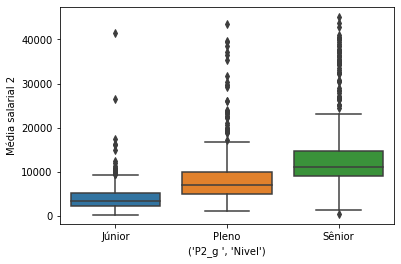

In [356]:
sns.boxplot(data = df,
           x = "('P2_g ', 'Nivel')",
           y = "Média salarial 2"
)

<AxesSubplot: title={'center': 'Utilizando números aleatórios'}, ylabel='Frequency'>

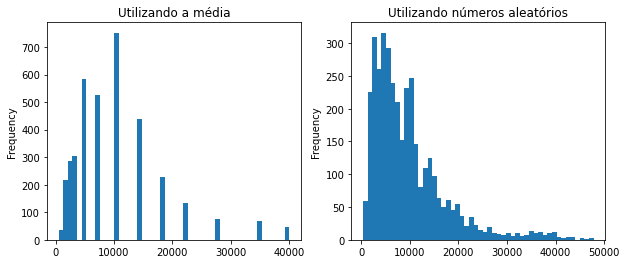

In [366]:
fig, ax = plt.subplots(1,2,figsize = (10,4))

df["Média salarial"].plot(kind = 'hist', ax = ax[0], bins = 50, title = "Utilizando a média")
df["Média salarial 2"].plot(kind = 'hist', ax = ax[1], bins = 50, title = "Utilizando números aleatórios")


In [361]:
ax

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

<AxesSubplot: xlabel='Média salarial 2', ylabel='Count'>

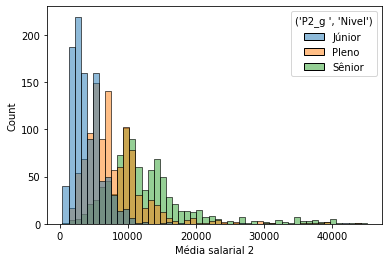

In [367]:
sns.histplot(data = df,
            x = "Média salarial 2",
            hue = "('P2_g ', 'Nivel')")

<AxesSubplot: xlabel='Média salarial 2', ylabel='Density'>

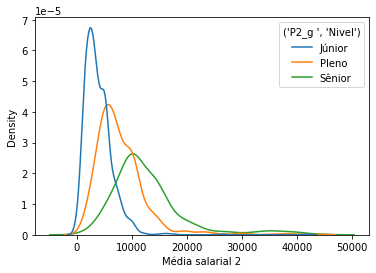

In [368]:
sns.kdeplot(data = df,
            x = "Média salarial 2",
            hue = "('P2_g ', 'Nivel')")

Como podemos "juntar" relações entre salário, idade e senioridade?

___

Há diferença salarial entre homens e não homens?

**ATENÇÃO:** nossa abordagem para inferir salários pode introduzir efeitos artificiais! Você conseguiria pensar em outras maneiras de realizar uma análise desse tipo?

Ao fazer uma tabela de contingência, estamos contabilizando o número de entradas em cada combinação de categorias (neste caso, faixas salarias e gênero).

Como podemos tentar verificar se as variáveis 'faixa salarial' e 'gênero' estão associadas?

O p-valor do teste indica que deveríamos rejeitar a hipótese de que não existe associação entre salário e gênero! (Mais detalhes serão vistos em Estatística I!).

___

Nessa aula, enfocamos o papel de utilizar visualizações para nos auxiliar a extrair insights e a identificar padrões! Note que há uma série de passos importantes em uma análise exploratória para os quais ainda não nos atentamos, como o tratamento de valores nulos e a identificação de outliers!

Exploraremos melhor esse tópico nas próximas aulas! 